# Analisi MOV vs STATIC ex post 'previsione' vs. 'reale'

In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [30]:
# Scelta automatica del Path locale tra "paoloartasensi" o "lorenzobassetti"
path = '/Users/paoloartasensi/Python_Scripts/artabax/'
isdir = os.path.isdir(path)
if isdir == True:
    path = '/Users/paoloartasensi/Python_Scripts/artabax/'
else:
    path = '/Users/lorenzobassetti/Dropbox/Quant/Python_DEV/artabax/'

In [31]:
df = pd.read_csv(path+'Gdrive_csv/20221227_1144PM_biceps_PROB.csv')
#df_raw.set_index('Time', inplace=True)
df

,timestamp,ax,ay,az,gx,gy,gz,pitch,roll,BAR,totacc,status,mov,prob
0,1672180968792,-5.542076,-4.442761,6.583909,0.280000,-0.210000,0.770000,27.304715,-40.089354,1003.510010,9.685070,0,static,0.077
1,1672180968905,-5.503755,-4.552932,6.562354,-1.399999,2.519999,-0.350000,27.994509,-39.986095,1003.586914,9.699742,0,static,0.085
2,1672180969022,-5.561235,-4.634363,6.682105,1.819999,0.980000,0.980000,28.061206,-39.769193,1003.622314,9.851659,0,static,0.076
3,1672180969138,-5.532495,-4.409231,6.502478,1.749999,0.420000,-0.350000,27.314008,-40.392093,1003.622803,9.608957,0,static,0.080
4,1672180969256,-5.333709,-4.734954,6.698870,-3.289999,-4.199998,2.519999,28.940896,-38.527163,1003.667725,9.784840,0,static,0.078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,1672181071288,-6.859336,-4.703819,4.893025,-1.889999,-0.490000,0.070000,29.173369,-54.498296,0.002441,9.649772,0,static,0.073
895,1672181071403,-6.876101,-4.739744,4.955296,-1.399999,-0.210000,0.140000,29.214901,-54.221412,0.000244,9.710865,0,static,0.071
896,1672181071523,-6.916817,-4.763694,4.933741,-0.490000,-0.210000,-0.140000,29.278922,-54.499873,-0.011230,9.740479,0,static,0.070
897,1672181071644,-6.895261,-4.758904,4.864285,-0.280000,-0.140000,0.140000,29.421297,-54.798817,-0.000732,9.687779,0,static,0.072


In [32]:
soglia_prob = 0.5
rolling_prob = 10

In [33]:
df.rolling(5).mean()
df['prob'] = df['prob'].rolling(rolling_prob).mean()

/var/folders/3c/slz2lm7j261c98fw2gd6wrz00000gp/T/ipykernel_18856/470161653.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['mov'], dtype='object')
  df.rolling(5).mean()


In [34]:
df['prob'].loc[df['prob'] > soglia_prob] = 1
df['prob'].loc[df['prob'] <= soglia_prob] = 0

/var/folders/3c/slz2lm7j261c98fw2gd6wrz00000gp/T/ipykernel_18856/508540148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prob'].loc[df['prob'] > soglia_prob] = 1
/var/folders/3c/slz2lm7j261c98fw2gd6wrz00000gp/T/ipykernel_18856/508540148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prob'].loc[df['prob'] <= soglia_prob] = 0


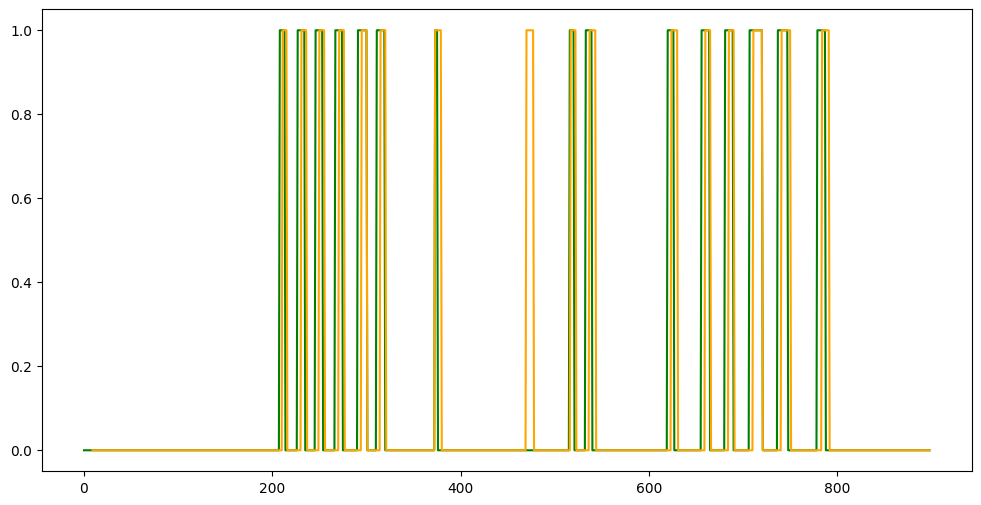

In [35]:
plt.figure(figsize=(12,6))
plt.plot(df['status'], color='green')
plt.plot(df['prob'], color='orange')
plt.show()